# Ch `04`: Concept `04` 

## Softmax classification

Import the usual libraries:

In [22]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Generated some initial 2D data:

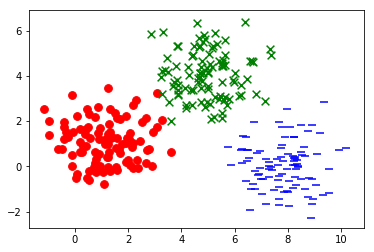

In [23]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))
# print(x2_label2)

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

Define the labels and shuffle the data:

In [24]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

xs = np.vstack((xs_label0, xs_label1, xs_label2))
# print(xs)
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))
arr = np.arange(xs.shape[0])
# print(arr)
np.random.shuffle(arr)
xs = xs[arr, :]
# print(arr[2, :])
labels = labels[arr, :]

We'll get back to this later, but the following are test inputs that we'll use to evaluate the model:

In [25]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

Again, define the placeholders, variables, model, and cost function:

In [27]:
train_size, num_features = xs.shape
X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

NameError: name 'train_sie' is not defined

Train the softmax classification model:

In [7]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        if step % 100 == 0:
            print (step, err)

    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.861


100 9.36824


200 5.7775


300 8.55452


400 6.1443


500 4.79988


600 7.4755


700 5.26917


800 4.38131


900 6.88532
1000 4.75894


1100 4.09939


1200 6.47484
1300 4.39554


1400 3.88415


1500 6.16188
1600 4.11486


1700 3.7099


1800 5.91134
1900 3.88893


2000 3.56381


2100 5.70417
2200 3.70252


2300 3.43833


2400 5.52863
2500 3.54611


2600 3.32862


2700 5.37693
2800 3.4132


2900 3.23135
w [[-2.44595695  0.22642043  2.21955132]
 [-0.16826613  1.44613063 -1.2778635 ]]
b [ 11.090662    -2.29036379  -8.80030727]
accuracy 1.0
